**Deklarasi model-model**

In [ ]:
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
# AdaBoost
ada_model = AdaBoostClassifier()
ada_param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1.0],
    'algorithm': ['SAMME', 'SAMME.R']
}

# Random Forest
rf_model = RandomForestClassifier()
rf_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Decision Tree
dt_model = DecisionTreeClassifier()
dt_param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Gradient Boosting
xgb_model = xgb.XGBClassifier()
xgb_param_grid = {
    'learning_rate': [0.05, 0.1, 0.2],
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'min_child_weight': [1, 3, 5],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'gamma': [0, 0.1],
    'scale_pos_weight': [1, 2],
    'booster': ['gbtree']

}


model = GaussianNB()

naive_param_grid = {
    'var_smoothing': [1e-12,1e-11,1e-10,1e-9, 1e-8, 1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1]
}

knn_param_grid = {
    'n_neighbors': [ 5, 10, 20, 50, 100, 150],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
}

knn = KNeighborsClassifier()

#Regressi
GBregression_model = GradientBoostingRegressor()
param_grid_gbr = {
    'n_estimators': [50, 100, 200],               # Number of boosting stages
    'learning_rate': [0.01, 0.1, 0.2, 0.3],       # Step size shrinkage
    'max_depth': [3, 5, 10],                      # Maximum depth of trees
    'min_samples_split': [2, 5, 10],              # Minimum samples required to split a node
    'min_samples_leaf': [1, 2, 4],                # Minimum samples required at a leaf node
    'subsample': [0.8, 1.0],                      # Fraction of samples for training each tree
    'max_features': ['sqrt', 'log2']      # Number of features to consider for best split
}
RFregression_model = RandomForestRegressor()
param_grid_rfr = {
    'n_estimators': [50, 100, 200],                # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],              # Maximum depth of each tree
    'min_samples_split': [2, 5, 10],              # Minimum samples required to split a node
    'min_samples_leaf': [1, 2, 4],                # Minimum samples required at each leaf node
    'max_features': [ 'sqrt', 'log2'],     # Number of features to consider for best split
    'bootstrap': [True, False]                    # Whether to use bootstrap samples
}
linear_model= LinearRegression()
lr_param_grid = {
    'fit_intercept': [True, False],
}
knn_reg_model = KNeighborsRegressor()

**Load dataset**

In [ ]:
import pandas as pd
#%reload_ext cudf.pandas # reload module pandas agar menggunakan CUDA (optional)

In [ ]:
from sklearn.datasets import load_iris, load_diabetes
iris = load_iris()
diabetes = load_diabetes()
# load dataset ke dataframe pandas
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
diabetes_df = pd.DataFrame(data=diabetes.data, columns=diabetes.feature_names)
# masukan kolom label/target ke dataframe
iris_df['target'] = iris.target
diabetes_df['target'] = diabetes.target
data=pd.read_csv('datasalmon4.csv')
# Cek dataset
print(iris_df.tail(10))

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
140                6.7               3.1                5.6               2.4   
141                6.9               3.1                5.1               2.3   
142                5.8               2.7                5.1               1.9   
143                6.8               3.2                5.9               2.3   
144                6.7               3.3                5.7               2.5   
145                6.7               3.0                5.2               2.3   
146                6.3               2.5                5.0               1.9   
147                6.5               3.0                5.2               2.0   
148                6.2               3.4                5.4               2.3   
149                5.9               3.0                5.1               1.8   

     target  
140       2  
141       2  
142       2  
143       2  
144       2  
145       2  
146       

In [ ]:
import numpy as np
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
# deklarasi fungsi-fungsi scaling
def pareto_scaling(X):
    return X / np.sqrt(np.std(X, axis=0))

def vast_scaling(X):
    return X / np.sqrt(np.var(X, axis=0))

def range_scaling(X):
    X_min = np.min(X, axis=0)
    X_max = np.max(X, axis=0)
    return (X - X_min) / (X_max - X_min)
def pareto_scaling_log_transformation(X):
    X_log = np.log(X)
    X_scaled = X_log / np.sqrt(np.std(X_log, axis=0))
    return X_scaled
def pareto_scaling_power_transformation(X, lambda_):
    X_power = np.power(X, lambda_)
    X_scaled = X_power / np.sqrt(np.std(X_power, axis=0))
    return X_scaled
def pareto_scaling_data_centering(X):
    X_scaled = X / np.sqrt(np.std(X, axis=0))
    X_centered = X_scaled - np.mean(X_scaled, axis=0)
    return X_centered

#deklarasi variabel fitur dan label
X = data.drop('label', axis=1)
y = data['label']

# masukan dataframe ke fungsi scaling
X_scaled = pareto_scaling(X)

#train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
#deklarasi model grid search untuk klasifikasi scoring = accuracy, untuk regresi = r2 / neg_mean_squared_error
#grid_search = GridSearchCV(knn,knn_param_grid, cv=5,scoring='neg_mean_squared_error')
knn.fit(X_train,y_train)
#fit / train model
# grid_search.fit(X_train, y_train)


# print(grid_search.best_params_)

# print(grid_search.best_score_)


KNeighborsClassifier()

              precision    recall  f1-score   support

           1       1.00      1.00      1.00      5018
           2       1.00      1.00      1.00      9517

    accuracy                           1.00     14535
   macro avg       1.00      1.00      1.00     14535
weighted avg       1.00      1.00      1.00     14535



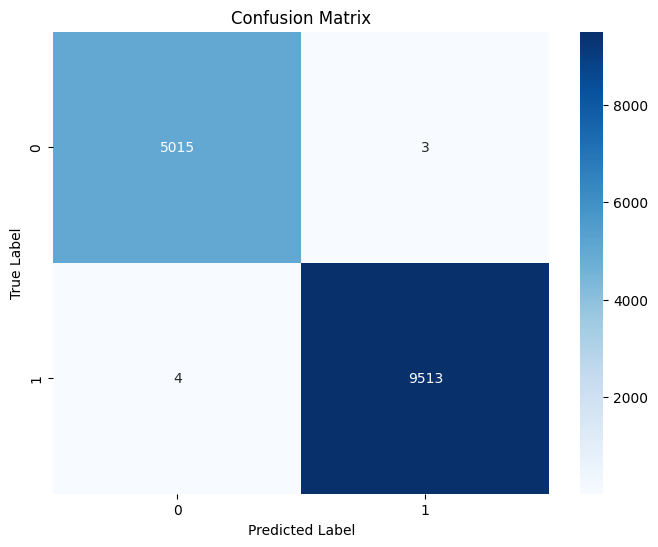

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, r2_score,mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns


#best_model = grid_search.best_estimator_

y_pred = knn.predict(X_test)
# print(mean_absolute_error(y_test, y_pred))
# print(r2_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
import locale
locale.getpreferredencoding = lambda: "UTF-8"
!pip install deepchecks

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.9/58.9 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 68.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.0/82.0 kB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 383.6/383.6 kB 23.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 90.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 92.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.4/34.4 MB 17.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 65.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.5/133.5 kB 11.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.4/66.4 kB 5.2 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.13.1
    Uninstalling scipy-1.13.1:
      Successfully uninstalled scipy-1.13.1
  Attempting uninstall: scikit-learn
    Found existing inst

In [ ]:
import pandas as pd

from deepchecks.tabular import Dataset
from deepchecks.tabular.checks import FeatureLabelCorrelation

df = pd.read_csv('data_tuna4.csv')

train_dataset = Dataset(df, label="label", cat_features=[])

feature_label_correlation_check = FeatureLabelCorrelation()

result = feature_label_correlation_check.run(train_dataset)

result.show()

<!--
 ~ ----------------------------------------------------------------------------
 ~ Copyright (C) 2021-2023 Deepchecks (https://www.deepchecks.com)
 ~
 ~ This file is part of Deepchecks.
 ~ Deepchecks is distributed under the terms of the GNU Affero General
 ~ Public License (version 3 or later).
 ~ You should have received a copy of the GNU Affero General Public License
 ~ along with Deepchecks. If not, see .
 ~ ----------------------------------------------------------------------------
 ~
-->
<!DOCTYPE html>
 
 
 
 Feature Label Correlation

In [ ]:
result.show()

<!--
 ~ ----------------------------------------------------------------------------
 ~ Copyright (C) 2021-2023 Deepchecks (https://www.deepchecks.com)
 ~
 ~ This file is part of Deepchecks.
 ~ Deepchecks is distributed under the terms of the GNU Affero General
 ~ Public License (version 3 or later).
 ~ You should have received a copy of the GNU Affero General Public License
 ~ along with Deepchecks. If not, see .
 ~ ----------------------------------------------------------------------------
 ~
-->
<!DOCTYPE html>
 
 
 
 Feature Label Correlation

In [ ]:
print(result)

Feature Label Correlation: {'Ammonia MQ137': 0.9657684808925607, 'Hydrogen': 0.6164051098500918, 'Methane': 0.5187066985832621, 'Alcohol': 0.4392265285551403}


In [ ]:
import joblib

joblib.dump(knn, 'knn iris.joblib')

['knn iris.joblib']

In [ ]:

from micromlgen import port
import joblib

# Load the model
print(port(xgb_best))